Source: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#minutes-to-pandas

In [1]:
import numpy as np
import pandas as pd

## Object Creation

### `Series`

Create a `Series` by passing a list of values, letting pandas create a default integer index

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### `DataFrame`

- Create `DataFrame` by passing a Numpy array

In [5]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [96]:
df = pd.DataFrame(np.random.randint(10, size=(6, 4)), 
                  index=dates,
                  columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,9,7,0,1
2013-01-02,2,3,3,9
2013-01-03,2,2,9,1
2013-01-04,1,4,5,2
2013-01-05,0,6,2,6
2013-01-06,4,4,0,7


- Create `DataFrame` by passing a dict of objects that can be converted to series-like

In [7]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'
})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
df2.A

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

### View top and bottom rows

In [10]:
# View top rows
df.head()

,A,B,C,D
2013-01-01,1,9,5,3
2013-01-02,6,9,4,7
2013-01-03,0,8,7,0
2013-01-04,9,2,2,2
2013-01-05,1,3,4,2


In [11]:
# View bottom rows
df.tail()

,A,B,C,D
2013-01-02,6,9,4,7
2013-01-03,0,8,7,0
2013-01-04,9,2,2,2
2013-01-05,1,3,4,2
2013-01-06,3,0,5,0


### Convert to Numpy representation


`DataFrame.to_numpy()`:

- can be an expensive operation when `DataFrame` has columns with different data types.

- does NOT include the index or column labels in the output.

In [12]:
df.to_numpy()

array([[1, 9, 5, 3],
       [6, 9, 4, 7],
       [0, 8, 7, 0],
       [9, 2, 2, 2],
       [1, 3, 4, 2],
       [3, 0, 5, 0]])

### Statistic summary

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,3.333333,5.166667,4.500000,2.333333
std,3.502380,3.970726,1.643168,2.581989
min,0.000000,0.000000,2.000000,0.000000
25%,1.000000,2.250000,4.000000,0.500000
50%,2.000000,5.500000,4.500000,2.000000
75%,5.250000,8.750000,5.000000,2.750000
max,9.000000,9.000000,7.000000,7.000000


### Transpose

In [14]:
df.transpose()

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1,6,0,9,1,3
B,9,9,8,2,3,0
C,5,4,7,2,4,5
D,3,7,0,2,2,0


### Sorting

In [19]:
# Sorting by an axis
df.sort_index(axis=1, ascending=True)

,A,B,C,D
2013-01-01,1,9,5,3
2013-01-02,6,9,4,7
2013-01-03,0,8,7,0
2013-01-04,9,2,2,2
2013-01-05,1,3,4,2
2013-01-06,3,0,5,0


In [20]:
# Sorting by values
df.sort_values(by='B')

,A,B,C,D
2013-01-06,3,0,5,0
2013-01-04,9,2,2,2
2013-01-05,1,3,4,2
2013-01-03,0,8,7,0
2013-01-01,1,9,5,3
2013-01-02,6,9,4,7


In [24]:
df.sort_values(by='A', ascending=True)

,A,B,C,D
2013-01-03,0,8,7,0
2013-01-01,1,9,5,3
2013-01-05,1,3,4,2
2013-01-06,3,0,5,0
2013-01-02,6,9,4,7
2013-01-04,9,2,2,2


## Selection

Use the optimized pandas data access methods:

- `.at`
- `.iat`
- `.loc`
- `.iloc`

### Getting

Select a single column via **column label**, which yields a `Series`

In [25]:
df['A']

2013-01-01    1
2013-01-02    6
2013-01-03    0
2013-01-04    9
2013-01-05    1
2013-01-06    3
Freq: D, Name: A, dtype: int64

In [26]:
df.A

2013-01-01    1
2013-01-02    6
2013-01-03    0
2013-01-04    9
2013-01-05    1
2013-01-06    3
Freq: D, Name: A, dtype: int64

Select via `[]`, which slices the rows.

In [28]:
df[0:3]

,A,B,C,D
2013-01-01,1,9,5,3
2013-01-02,6,9,4,7
2013-01-03,0,8,7,0


In [30]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,6,9,4,7
2013-01-03,0,8,7,0
2013-01-04,9,2,2,2


### Selection by label: `loc`

In [34]:
df

,A,B,C,D
2013-01-01,1,9,5,3
2013-01-02,6,9,4,7
2013-01-03,0,8,7,0
2013-01-04,9,2,2,2
2013-01-05,1,3,4,2
2013-01-06,3,0,5,0


In [32]:
df.loc['20130101']

A    1
B    9
C    5
D    3
Name: 2013-01-01 00:00:00, dtype: int64

In [31]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [33]:
df.loc[dates[0]]

A    1
B    9
C    5
D    3
Name: 2013-01-01 00:00:00, dtype: int64

Multi-axis:

In [35]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,1,9
2013-01-02,6,9
2013-01-03,0,8
2013-01-04,9,2
2013-01-05,1,3
2013-01-06,3,0


Showing label slicing, both endpoints are *included*:

In [36]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,6,9
2013-01-03,0,8
2013-01-04,9,2


In [37]:
df.loc['20130101', 'C']

5

### Selection by position/index: `iloc`

Similar to the numpy/python style

In [40]:
df

,A,B,C,D
2013-01-01,1,9,5,3
2013-01-02,6,9,4,7
2013-01-03,0,8,7,0
2013-01-04,9,2,2,2
2013-01-05,1,3,4,2
2013-01-06,3,0,5,0


Select via the position of the passed integers

In [42]:
df.iloc[3] # the 4-th row

A    9
B    2
C    2
D    2
Name: 2013-01-04 00:00:00, dtype: int64

In [41]:
# Integer slices
df.iloc[3:5, 0:2]

,A,B
2013-01-04,9,2
2013-01-05,1,3


In [43]:
# Lists of integer position location
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,6,4
2013-01-03,0,7
2013-01-05,1,4


In [44]:
# Slice rows
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,6,9,4,7
2013-01-03,0,8,7,0


In [45]:
# Slice columns
df.iloc[:, 1:3]

,B,C
2013-01-01,9,5
2013-01-02,9,4
2013-01-03,8,7
2013-01-04,2,2
2013-01-05,3,4
2013-01-06,0,5


In [46]:
# Access a value
df.iloc[0, 1]

9

### Boolean indexing

Use a single column's value to select data:

In [47]:
df

,A,B,C,D
2013-01-01,1,9,5,3
2013-01-02,6,9,4,7
2013-01-03,0,8,7,0
2013-01-04,9,2,2,2
2013-01-05,1,3,4,2
2013-01-06,3,0,5,0


In [51]:
df[(df['A'] >= 1) & (df['A'] < 9)]

,A,B,C,D
2013-01-01,1,9,5,3
2013-01-02,6,9,4,7
2013-01-05,1,3,4,2
2013-01-06,3,0,5,0


In [52]:
df[(df.A >= 1) & (df.A < 9)]

,A,B,C,D
2013-01-01,1,9,5,3
2013-01-02,6,9,4,7
2013-01-05,1,3,4,2
2013-01-06,3,0,5,0


Select values from a DataFrame where a boolean condition is met:

In [53]:
df[df>0]

,A,B,C,D
2013-01-01,1.0,9.0,5,3.0
2013-01-02,6.0,9.0,4,7.0
2013-01-03,NaN,8.0,7,NaN
2013-01-04,9.0,2.0,2,2.0
2013-01-05,1.0,3.0,4,2.0
2013-01-06,3.0,NaN,5,NaN


Filtering: use `isin()` method

In [55]:
df2 = df.copy()

In [56]:
df2

,A,B,C,D
2013-01-01,1,9,5,3
2013-01-02,6,9,4,7
2013-01-03,0,8,7,0
2013-01-04,9,2,2,2
2013-01-05,1,3,4,2
2013-01-06,3,0,5,0


In [106]:
# Extend data frame with a new column
df2['E'] = range(df2.shape[0])

In [107]:
df2

,A,B,C,D,E
2013-01-01,-5,99,-99,-3,0
2013-01-02,-2,-8,-99,-6,1
2013-01-03,-9,-2,0,-1,2
2013-01-04,-9,0,-99,-7,3
2013-01-05,0,-9,-99,-9,4
2013-01-06,-9,-2,-99,-9,5


In [108]:
df2[df2['E'].isin([2, 3])]

,A,B,C,D,E
2013-01-03,-9,-2,0,-1,2
2013-01-04,-9,0,-99,-7,3


### Setting

#### Setting a new column automatically aligns the data by the indexes.

In [71]:
num_rows = df.shape[0]
s1 = pd.Series(range(num_rows), 
               index=pd.date_range('20130103', periods=num_rows))

In [72]:
s1

2013-01-03    0
2013-01-04    1
2013-01-05    2
2013-01-06    3
2013-01-07    4
2013-01-08    5
Freq: D, dtype: int64

In [76]:
df

,A,B,C,D
2013-01-01,5,2,3,3
2013-01-02,2,8,2,6
2013-01-03,9,2,5,1
2013-01-04,9,0,8,7
2013-01-05,0,9,8,9
2013-01-06,9,2,7,9


In [77]:
df2 = df.copy()

In [78]:
df2

,A,B,C,D
2013-01-01,5,2,3,3
2013-01-02,2,8,2,6
2013-01-03,9,2,5,1
2013-01-04,9,0,8,7
2013-01-05,0,9,8,9
2013-01-06,9,2,7,9


In [79]:
df2['F'] = s1

In [80]:
df2

,A,B,C,D,F
2013-01-01,5,2,3,3,NaN
2013-01-02,2,8,2,6,NaN
2013-01-03,9,2,5,1,0.0
2013-01-04,9,0,8,7,1.0
2013-01-05,0,9,8,9,2.0
2013-01-06,9,2,7,9,3.0


#### Setting values by label: `at`

In [88]:
df2 = df.copy()
df2

,A,B,C,D
2013-01-01,5,2,3,3
2013-01-02,2,8,2,6
2013-01-03,9,2,5,1
2013-01-04,9,0,8,7
2013-01-05,0,9,8,9
2013-01-06,9,2,7,9


In [86]:
print("Value before Setting:", df2.loc[dates[0], 'A'])

# Set value
df2.at[dates[0], 'A'] = 99

print("Value after setting:", df2.loc[dates[0], 'A'])

Value before Setting: 5
Value after setting: 99


#### Setting values by position: `iat`

In [101]:
print("Value before Setting:", df2.iloc[0, 1])

# Set value
df2.iat[0, 1] = 99

print("Value after setting:", df2.iloc[0, 1])

Value before Setting: 2
Value after setting: 99


In [103]:
df2.iloc[2, 2]

-99

In [104]:
df2.iloc[2, 2] = 0
df2.iloc[2, 2]

0

#### Setting by assigning with a Numpy array

In [89]:
# Before setting
df2.loc[:, 'C']

2013-01-01    3
2013-01-02    2
2013-01-03    5
2013-01-04    8
2013-01-05    8
2013-01-06    7
Freq: D, Name: C, dtype: int64

In [90]:
df2.loc[:, 'C'] = np.array([99] * len(df2))

In [91]:
# After setting
df2.loc[:, 'C']

2013-01-01    99
2013-01-02    99
2013-01-03    99
2013-01-04    99
2013-01-05    99
2013-01-06    99
Freq: D, Name: C, dtype: int64

#### `where` operation with setting

In [92]:
df2

,A,B,C,D
2013-01-01,5,2,99,3
2013-01-02,2,8,99,6
2013-01-03,9,2,99,1
2013-01-04,9,0,99,7
2013-01-05,0,9,99,9
2013-01-06,9,2,99,9


In [93]:
df2[df2 > 0] = -df2

In [98]:
df2

,A,B,C,D
2013-01-01,-5,-2,-99,-3
2013-01-02,-2,-8,-99,-6
2013-01-03,-9,-2,-99,-1
2013-01-04,-9,0,-99,-7
2013-01-05,0,-9,-99,-9
2013-01-06,-9,-2,-99,-9


## Missing Data

Pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. 

In [114]:
df

,A,B,C,D
2013-01-01,9,7,0,1
2013-01-02,2,3,3,9
2013-01-03,2,2,9,1
2013-01-04,1,4,5,2
2013-01-05,0,6,2,6
2013-01-06,4,4,0,7


Reindexing: change/add/delete the index on a specified axis and reurns a copy of the data.

In [111]:
df1 = df.reindex(index=dates[0:4], 
                 columns=list(df.columns) + ['E'])
                 
df1

,A,B,C,D,E
2013-01-01,9.0,7.0,0.0,1.0,NaN
2013-01-02,2.0,3.0,3.0,9.0,NaN
2013-01-03,2.0,2.0,9.0,1.0,NaN
2013-01-04,1.0,4.0,5.0,2.0,NaN


In [112]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [113]:
df1

,A,B,C,D,E
2013-01-01,9.0,7.0,0.0,1.0,1.0
2013-01-02,2.0,3.0,3.0,9.0,1.0
2013-01-03,2.0,2.0,9.0,1.0,NaN
2013-01-04,1.0,4.0,5.0,2.0,NaN


Drop any rows that have missing data

In [115]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,9.0,7.0,0.0,1.0,1.0
2013-01-02,2.0,3.0,3.0,9.0,1.0


Fill missing data

In [116]:
df1.fillna(value=99)

,A,B,C,D,E
2013-01-01,9.0,7.0,0.0,1.0,1.0
2013-01-02,2.0,3.0,3.0,9.0,1.0
2013-01-03,2.0,2.0,9.0,1.0,99.0
2013-01-04,1.0,4.0,5.0,2.0,99.0


Get the boolean mask where values are `nan`

In [118]:
df1

,A,B,C,D,E
2013-01-01,9.0,7.0,0.0,1.0,1.0
2013-01-02,2.0,3.0,3.0,9.0,1.0
2013-01-03,2.0,2.0,9.0,1.0,NaN
2013-01-04,1.0,4.0,5.0,2.0,NaN


In [117]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operations

### Stats

Operations in general exclude missing data.

In [119]:
df

,A,B,C,D
2013-01-01,9,7,0,1
2013-01-02,2,3,3,9
2013-01-03,2,2,9,1
2013-01-04,1,4,5,2
2013-01-05,0,6,2,6
2013-01-06,4,4,0,7


Descriptive statistc:

In [120]:
df.mean()

A    3.000000
B    4.333333
C    3.166667
D    4.333333
dtype: float64

In [122]:
# Same operation on the other axis
df.mean(1)

2013-01-01    4.25
2013-01-02    4.25
2013-01-03    3.50
2013-01-04    3.00
2013-01-05    3.50
2013-01-06    3.75
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. (pandas automatically broadcasts along the specified dimension.)

In [124]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [125]:
df

,A,B,C,D
2013-01-01,9,7,0,1
2013-01-02,2,3,3,9
2013-01-03,2,2,9,1
2013-01-04,1,4,5,2
2013-01-05,0,6,2,6
2013-01-06,4,4,0,7


In [126]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,1.0,1.0,8.0,0.0
2013-01-04,-2.0,1.0,2.0,-1.0
2013-01-05,-5.0,1.0,-3.0,1.0
2013-01-06,NaN,NaN,NaN,NaN


### Apply

Apply functions to the data

In [128]:
df

,A,B,C,D
2013-01-01,9,7,0,1
2013-01-02,2,3,3,9
2013-01-03,2,2,9,1
2013-01-04,1,4,5,2
2013-01-05,0,6,2,6
2013-01-06,4,4,0,7


In [127]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,9,7,0,1
2013-01-02,11,10,3,10
2013-01-03,13,12,12,11
2013-01-04,14,16,17,13
2013-01-05,14,22,19,19
2013-01-06,18,26,19,26


In [129]:
df.apply(lambda x: x + 1)

,A,B,C,D
2013-01-01,10,8,1,2
2013-01-02,3,4,4,10
2013-01-03,3,3,10,2
2013-01-04,2,5,6,3
2013-01-05,1,7,3,7
2013-01-06,5,5,1,8


### Histogramming

In [131]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    1
2    2
3    2
4    2
5    1
6    3
7    0
8    0
9    5
dtype: int64

In [134]:
s.value_counts(ascending=True)

3    1
5    1
0    2
1    3
2    3
dtype: int64

### String methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, 

In [136]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [137]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

`concat()`: Concatenate panda objects together

In [138]:
df

,A,B,C,D
2013-01-01,9,7,0,1
2013-01-02,2,3,3,9
2013-01-03,2,2,9,1
2013-01-04,1,4,5,2
2013-01-05,0,6,2,6
2013-01-06,4,4,0,7


In [140]:
pieces = [df[:3], df[3:5], df[5:]]
pieces

[            A  B  C  D
 2013-01-01  9  7  0  1
 2013-01-02  2  3  3  9
 2013-01-03  2  2  9  1,
             A  B  C  D
 2013-01-04  1  4  5  2
 2013-01-05  0  6  2  6,
             A  B  C  D
 2013-01-06  4  4  0  7]

In [141]:
pd.concat(pieces)

,A,B,C,D
2013-01-01,9,7,0,1
2013-01-02,2,3,3,9
2013-01-03,2,2,9,1
2013-01-04,1,4,5,2
2013-01-05,0,6,2,6
2013-01-06,4,4,0,7


Note:

Adding a column to a DataFrame is relatively fast. **However, adding a row requires a copy, and may be expensive.**

We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.

### Join

SQL style merges.

In [142]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [143]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [144]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [145]:
# Another example
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [146]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [147]:
pd.merge(right, left, on='key')

,key,rval,lval
0,foo,4,1
1,bar,5,2


## Grouping

'Group by' refers to a process:

- Splitting the data into groups based on some criteria

- Applying a function to each group independently

- Combining the results into a data structure

In [150]:
df3 = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randint(0, 8, size=8),
                    'D': np.random.randint(0, 8, size=8)
                   })

In [151]:
df3

,A,B,C,D
0,foo,one,3,1
1,bar,one,6,5
2,foo,two,5,7
3,bar,three,6,1
4,foo,two,0,3
5,bar,two,1,6
6,foo,one,2,6
7,foo,three,3,3


In [152]:
# Group and then apply sum() to the resulting group
df3.groupby('A').sum()

,C,D
A,,
bar,13,12
foo,13,20


In [153]:
# Grouping by multiple columns forms a hierarchical index
df3.groupby(['A', 'B']).sum()

C   D
A   B           
bar one    6   5
    three  6   1
    two    1   6
foo one    5   7
    three  3   3
    two    5  10

## Reshaping

### Stack

In [154]:
tuples = list(zip(*[
    ['bar', 'bar', 'baz', 'baz',
     'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 
     'one', 'two', 'one', 'two']
]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [155]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [158]:
df = pd.DataFrame(np.random.randint(10, size=(8, 2)), 
                  index=index, 
                  columns=['A', 'B'])

In [159]:
df

A  B
first second      
bar   one     2  6
      two     5  9
baz   one     2  9
      two     3  5
foo   one     8  9
      two     4  9
qux   one     3  0
      two     6  9

In [161]:
df2 = df[:4]
df2

A  B
first second      
bar   one     2  6
      two     5  9
baz   one     2  9
      two     3  5

`stack()`: "compresses" a level in the DataFrame's columns

In [162]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    2
               B    6
       two     A    5
               B    9
baz    one     A    2
               B    9
       two     A    3
               B    5
dtype: int64

`unstack()`: inverse operation of `stack()`, by default unstacks the last level

In [163]:
stacked.unstack()

A  B
first second      
bar   one     2  6
      two     5  9
baz   one     2  9
      two     3  5

### Pivot tables

In [169]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

In [170]:
df

,A,B,C,D,E
0,one,A,foo,-1.392325,-0.819227
1,one,B,foo,-0.049005,0.103250
2,two,C,foo,-0.143424,-0.248113
3,three,A,bar,0.198961,-1.104964
4,one,B,bar,-0.190727,-0.486461
5,one,C,bar,-0.243331,-0.647110
6,two,A,foo,0.608281,0.377368
7,three,B,foo,-0.357412,-0.833808
8,one,C,foo,-0.544984,1.531878
9,one,A,bar,0.539371,0.190145


In [168]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.633458  0.426045
      B -1.339950 -0.701659
      C -2.089451 -1.863903
three A  0.559643       NaN
      B       NaN  0.629061
      C -0.154613       NaN
two   A       NaN  0.983509
      B  0.171170       NaN
      C       NaN -1.453208

## Time Series

In [172]:
rng = pd.date_range('1/1/2020', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [173]:
ts

2020-01-01 00:00:00    382
2020-01-01 00:00:01    113
2020-01-01 00:00:02    483
2020-01-01 00:00:03      0
2020-01-01 00:00:04    139
                      ... 
2020-01-01 00:01:35     50
2020-01-01 00:01:36    389
2020-01-01 00:01:37    152
2020-01-01 00:01:38    355
2020-01-01 00:01:39    380
Freq: S, Length: 100, dtype: int64

In [174]:
ts.resample('5Min').sum()

2020-01-01    25583
Freq: 5T, dtype: int64

Time zone representation:

In [175]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

In [176]:
ts

2012-03-06    1.570123
2012-03-07   -0.580223
2012-03-08   -0.224361
2012-03-09   -1.982025
2012-03-10    0.600972
Freq: D, dtype: float64

In [177]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    1.570123
2012-03-07 00:00:00+00:00   -0.580223
2012-03-08 00:00:00+00:00   -0.224361
2012-03-09 00:00:00+00:00   -1.982025
2012-03-10 00:00:00+00:00    0.600972
Freq: D, dtype: float64

In [178]:
# Convert to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.570123
2012-03-06 19:00:00-05:00   -0.580223
2012-03-07 19:00:00-05:00   -0.224361
2012-03-08 19:00:00-05:00   -1.982025
2012-03-09 19:00:00-05:00    0.600972
Freq: D, dtype: float64

## Categoricals

In [182]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

In [183]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type

In [194]:
df['grade'] = df['raw_grade'].astype('category')

In [195]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [196]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names:

In [197]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories

In [198]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", 
                                              "good", "very good"])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories

In [199]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Group by a categorical column

In [200]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [205]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.close('all')

Series:

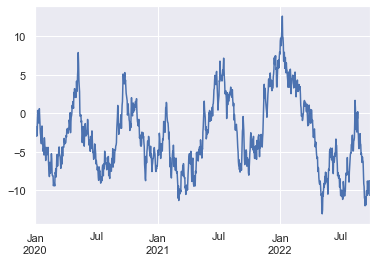

In [206]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range('1/1/2020', periods=1000))
ts = ts.cumsum()
ts.plot()

For DataFrame, the `plot()` method is a convenience to plot all of the columns with labels:

In [207]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, 
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

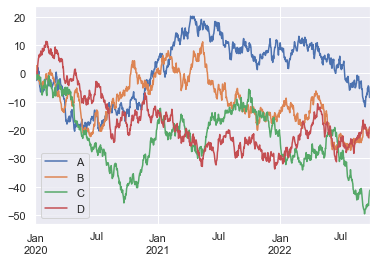

In [208]:
plt.figure()
df.plot()
plt.legend(loc='best')

## Getting Data in/out

### CSV

In [209]:
df.to_csv('foo.csv')

In [210]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2020-01-01,-2.723096,1.984534,0.703051,-0.433060
1,2020-01-02,-2.425236,1.556540,-0.958083,0.688933
2,2020-01-03,-2.334300,1.689127,-1.782500,0.107781
3,2020-01-04,-1.330703,2.717242,-0.863739,0.192463
4,2020-01-05,-2.310861,0.921749,-0.225470,0.104990
...,...,...,...,...,...
995,2022-09-22,-4.829142,-19.668921,-44.295449,-20.760034
996,2022-09-23,-6.989909,-20.698093,-43.047819,-21.012218
997,2022-09-24,-8.491811,-20.620965,-41.728552,-18.938680
998,2022-09-25,-7.546770,-21.545376,-41.254648,-19.976880


### HDF5

In [211]:
df.to_hdf('foo.h5', 'df')

In [212]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2020-01-01,-2.723096,1.984534,0.703051,-0.433060
2020-01-02,-2.425236,1.556540,-0.958083,0.688933
2020-01-03,-2.334300,1.689127,-1.782500,0.107781
2020-01-04,-1.330703,2.717242,-0.863739,0.192463
2020-01-05,-2.310861,0.921749,-0.225470,0.104990
...,...,...,...,...
2022-09-22,-4.829142,-19.668921,-44.295449,-20.760034
2022-09-23,-6.989909,-20.698093,-43.047819,-21.012218
2022-09-24,-8.491811,-20.620965,-41.728552,-18.938680
2022-09-25,-7.546770,-21.545376,-41.254648,-19.976880


### Excel

In [213]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [214]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2020-01-01,-2.723096,1.984534,0.703051,-0.433060
1,2020-01-02,-2.425236,1.556540,-0.958083,0.688933
2,2020-01-03,-2.334300,1.689127,-1.782500,0.107781
3,2020-01-04,-1.330703,2.717242,-0.863739,0.192463
4,2020-01-05,-2.310861,0.921749,-0.225470,0.104990
...,...,...,...,...,...
995,2022-09-22,-4.829142,-19.668921,-44.295449,-20.760034
996,2022-09-23,-6.989909,-20.698093,-43.047819,-21.012218
997,2022-09-24,-8.491811,-20.620965,-41.728552,-18.938680
998,2022-09-25,-7.546770,-21.545376,-41.254648,-19.976880
